<a href="https://colab.research.google.com/github/NID123-CH/DSR-40/blob/main/DSR_40_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A hypothesis test is a formal statistical test we use to reject or fail to reject some statistical hypot**hesis.



how to perform the following hypothesis tests in Python:

One sample t-test
Two sample t-test
Paired samples t-test




 **1.t-Test:Compare means of continuous data between two groups**

In [1]:
import numpy as np
import scipy.stats as stats

# Create a dummy dataset of 10 year old children's weight
data = np.random.randint(20, 40, 10)

# Define the null hypothesis
H0 = "The average weight of 10 year old children is 32kg."

# Define the alternative hypothesis
H1 = "The average weight of 10 year old children is more than 32kg."

# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(data, 32)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test statistic: -0.15039740709678295
p-value: 0.8837678182045328
Fail to reject the null hypothesis.


In [2]:
import numpy as np
from scipy import stats

In [3]:
# Randomly generating test scores for Group A and Group B
np.random.seed(0)  # for reproducibility
group_A_scores = np.random.normal(75, 10, 30)
group_B_scores = np.random.normal(80, 10, 30)

In [4]:
group_A_scores, group_B_scores

(array([92.64052346, 79.00157208, 84.78737984, 97.40893199, 93.6755799 ,
        65.2272212 , 84.50088418, 73.48642792, 73.96781148, 79.10598502,
        76.44043571, 89.54273507, 82.61037725, 76.21675016, 79.43863233,
        78.33674327, 89.94079073, 72.94841736, 78.13067702, 66.45904261,
        49.47010184, 81.53618595, 83.64436199, 67.5783498 , 97.69754624,
        60.45634325, 75.45758517, 73.1281615 , 90.32779214, 89.6935877 ]),
 array([81.54947426, 83.7816252 , 71.12214252, 60.19203532, 76.52087851,
        81.56348969, 92.30290681, 92.02379849, 76.12673183, 76.97697249,
        69.51447035, 65.79982063, 62.93729809, 99.50775395, 74.90347818,
        75.61925698, 67.4720464 , 87.77490356, 63.86102152, 77.8725972 ,
        71.04533439, 83.86902498, 74.89194862, 68.19367816, 79.71817772,
        84.28331871, 80.66517222, 83.02471898, 73.65677906, 76.37258834]))

In [5]:
# Perform t-test
t_stat, p_val = stats.ttest_ind(group_A_scores, group_B_scores)

In [6]:
print(f'Test statistic (t): {t_stat}')
print(f'p-value: {p_val}')

Test statistic (t): 0.8897019207505203
p-value: 0.37730145339434484


**=> We don't reject H0 ("we choose H0"), i.e. there is no significant difference between these groups**

**Graphical depiction:**

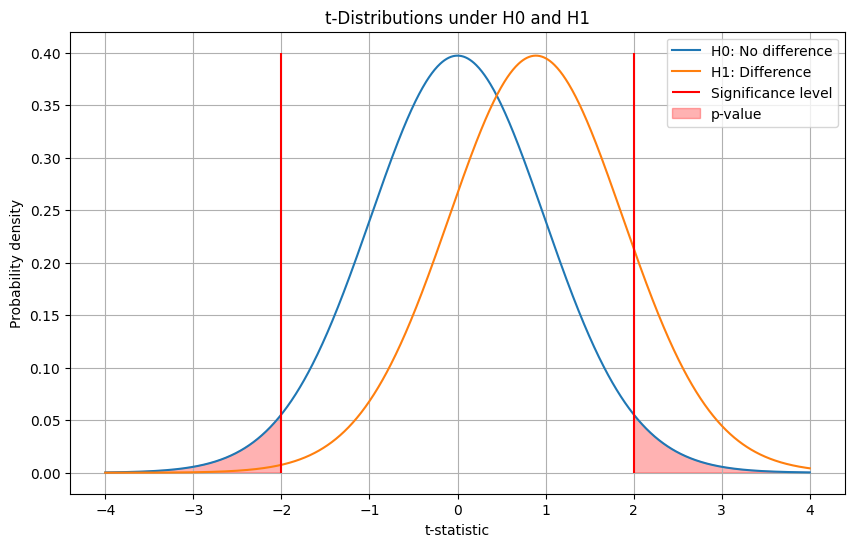

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
df = 58 #30  # degrees of freedom

# Variant A ( => H0 is not rejected, simply said: "H0 is selected"):
t_stat = 0.8897019207505203  # t-statistic from our t-test

# Variant B ( => H0 is rejected, simply said: "H1 is selected"):
#t_stat = -2.938977037944519  # t-statistic from our t-test

alpha = 0.05  # significance level

# Generate values for x axis
x = np.linspace(-4, 4, 1000)

# Calculate t-distributions
t_H0 = t.pdf(x, df, 0, 1)  # under H0: mean=0, std_dev=1
t_H1 = t.pdf(x, df, t_stat, 1)  # under H1: mean=t_stat, std_dev=1

# Calculate critical value (two-tailed test)
t_crit = t.ppf(1 - alpha/2, df)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.plot(x, t_H0, label='H0: No difference')
plt.plot(x, t_H1, label='H1: Difference')
plt.vlines([t_crit, -t_crit], 0, 0.4, colors='r', label='Significance level')
plt.fill_between(x, t_H0, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.3, label='p-value')
plt.legend()
plt.xlabel('t-statistic')
plt.ylabel('Probability density')
plt.title('t-Distributions under H0 and H1')
plt.grid(True)
plt.show()

In [8]:
t_crit

2.0017174841452356

**Variant B:**

In [9]:
np.random.seed(0)  # for reproducibility
group_A_scores = np.random.normal(75, 10, 30)  # mean=75, std_dev=10, n=30
group_B_scores = np.random.normal(90, 10, 30)  # mean=80, std_dev=10, n=30

# Perform t-test
t_stat, p_val = stats.ttest_ind(group_A_scores, group_B_scores)

print(f'Test statistic (t): {np.abs(t_stat)}')
print(f'p-value: {p_val}')


Test statistic (t): 2.938977037944519
p-value: 0.0047203354382443765


**=> We reject H0 ("we choose H1"), i.e. there is significant difference between these groups**

**Graphical depiction:**

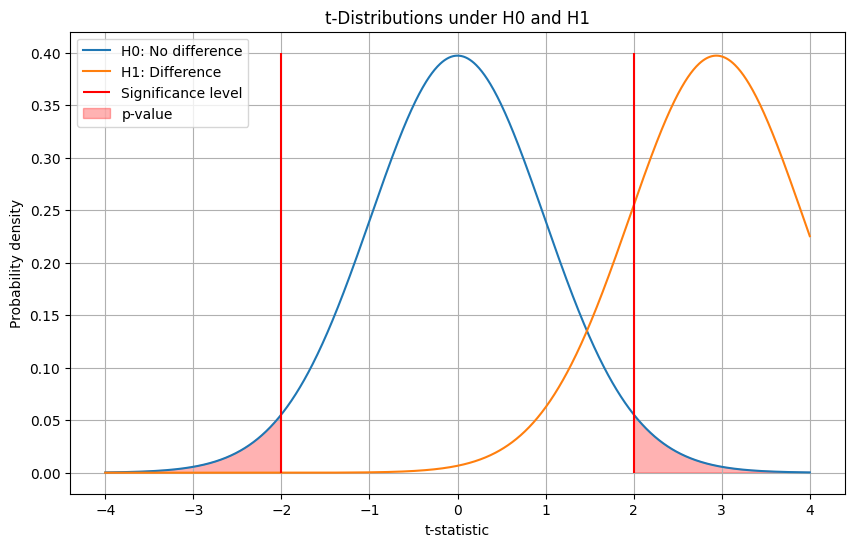

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
df = 58 #30  # degrees of freedom

# Variant A ( => H0 is not rejected, simply said: "H0 is selected"):
t_stat = 2.938977037944519  # t-statistic from our t-test

# Variant B ( => H0 is rejected, simply said: "H1 is selected"):
#t_stat = -2.938977037944519  # t-statistic from our t-test

alpha = 0.05  # significance level

# Generate values for x axis
x = np.linspace(-4, 4, 1000)

# Calculate t-distributions
t_H0 = t.pdf(x, df, 0, 1)  # under H0: mean=0, std_dev=1
t_H1 = t.pdf(x, df, t_stat, 1)  # under H1: mean=t_stat, std_dev=1

# Calculate critical value (two-tailed test)
t_crit = t.ppf(1 - alpha/2, df)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.plot(x, t_H0, label='H0: No difference')
plt.plot(x, t_H1, label='H1: Difference')
plt.vlines([t_crit, -t_crit], 0, 0.4, colors='r', label='Significance level')
plt.fill_between(x, t_H0, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.3, label='p-value')
plt.legend()
plt.xlabel('t-statistic')
plt.ylabel('Probability density')
plt.title('t-Distributions under H0 and H1')
plt.grid(True)
plt.show()

**A paired t-test is designed to compare the means of the same group or item under two separate scenarios. An unpaired t-test compares the means of two independent or unrelated groups. In an unpaired t-test, the variance between groups is assumed to be equal. In a paired t-test, the variance is not assumed to be equal**

** t-Test: Compare means of continuous data between the same group at different times**

In [11]:
import numpy as np
from scipy import stats

**Variant A:**

In [12]:
# Randomly generating test scores for Group A and Group B
np.random.seed(0)  # for reproducibility
before =  np.random.normal(75, 10, 30)
after = np.random.normal(80, 10, 30)

In [13]:
before, after

(array([92.64052346, 79.00157208, 84.78737984, 97.40893199, 93.6755799 ,
        65.2272212 , 84.50088418, 73.48642792, 73.96781148, 79.10598502,
        76.44043571, 89.54273507, 82.61037725, 76.21675016, 79.43863233,
        78.33674327, 89.94079073, 72.94841736, 78.13067702, 66.45904261,
        49.47010184, 81.53618595, 83.64436199, 67.5783498 , 97.69754624,
        60.45634325, 75.45758517, 73.1281615 , 90.32779214, 89.6935877 ]),
 array([81.54947426, 83.7816252 , 71.12214252, 60.19203532, 76.52087851,
        81.56348969, 92.30290681, 92.02379849, 76.12673183, 76.97697249,
        69.51447035, 65.79982063, 62.93729809, 99.50775395, 74.90347818,
        75.61925698, 67.4720464 , 87.77490356, 63.86102152, 77.8725972 ,
        71.04533439, 83.86902498, 74.89194862, 68.19367816, 79.71817772,
        84.28331871, 80.66517222, 83.02471898, 73.65677906, 76.37258834]))

In [14]:
t_statistic, p_value = stats.ttest_rel(before, after)

print(f"t-statistic: {np.abs(t_statistic)}")
print(f"p-value: {p_value}")

t-statistic: 0.8090320565725655
p-value: 0.4250848378045745


**=> We don't reject H0 ("we choose H0"), i.e. there is no significant difference between these points of time**

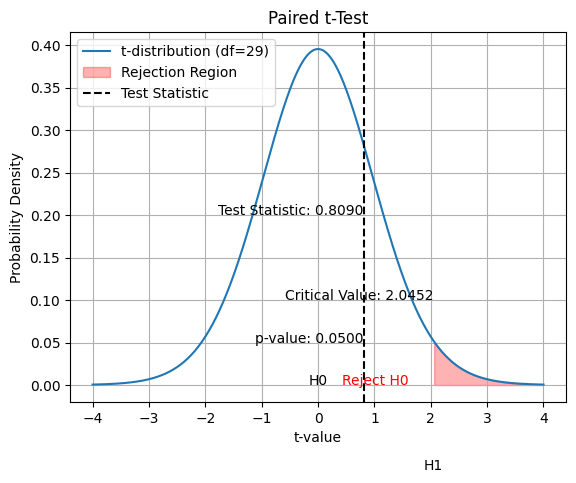

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
alpha = 0.05
df1 = 29
test_statistic = 0.8090320565725655
h0 = "H0"
h1 = "H1"
p_value = 0.05  # Example p-value, you should replace it with the actual value

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the t-distribution
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df=df1)
ax.plot(x, y, label='t-distribution (df={})'.format(df1))

# Shade the region beyond the critical value
cv = stats.t.ppf(1 - alpha/2, df=df1)
ax.fill_between(x, y, where=(x >= cv), color='red', alpha=0.3, label='Rejection Region')

# Plot the test statistic
ax.axvline(x=test_statistic, color='black', linestyle='--', label='Test Statistic')

# Add labels and title
ax.set_xlabel('t-value')
ax.set_ylabel('Probability Density')
ax.set_title('Paired t-Test')

# Add legend
ax.legend()

# Add text annotations
ax.text(test_statistic, 0.2, 'Test Statistic: {:.4f}'.format(test_statistic), ha='right')
ax.text(cv, 0.1, 'Critical Value: {:.4f}'.format(cv), ha='right')
ax.text(test_statistic, 0.05, 'p-value: {:.4f}'.format(p_value), ha='right')
ax.text(0, 0, h0, ha='center')
ax.text(cv/2, 0, 'Reject H0', ha='center', color='red')
ax.text(cv, -0.1, h1, ha='center')

# Show the plot
plt.grid(True)
plt.show()

**Variant B:**

In [16]:
# Randomly generating test scores for Group A and Group B
np.random.seed(0)  # for reproducibility
before =  np.random.normal(75, 10, 30)
after = np.random.normal(100, 10, 30)

In [17]:
before, after

(array([92.64052346, 79.00157208, 84.78737984, 97.40893199, 93.6755799 ,
        65.2272212 , 84.50088418, 73.48642792, 73.96781148, 79.10598502,
        76.44043571, 89.54273507, 82.61037725, 76.21675016, 79.43863233,
        78.33674327, 89.94079073, 72.94841736, 78.13067702, 66.45904261,
        49.47010184, 81.53618595, 83.64436199, 67.5783498 , 97.69754624,
        60.45634325, 75.45758517, 73.1281615 , 90.32779214, 89.6935877 ]),
 array([101.54947426, 103.7816252 ,  91.12214252,  80.19203532,
         96.52087851, 101.56348969, 112.30290681, 112.02379849,
         96.12673183,  96.97697249,  89.51447035,  85.79982063,
         82.93729809, 119.50775395,  94.90347818,  95.61925698,
         87.4720464 , 107.77490356,  83.86102152,  97.8725972 ,
         91.04533439, 103.86902498,  94.89194862,  88.19367816,
         99.71817772, 104.28331871, 100.66517222, 103.02471898,
         93.65677906,  96.37258834]))

In [18]:
# Perform t-test
t_stat, p_val = stats.ttest_ind(group_A_scores, group_B_scores)

In [19]:
t_statistic, p_value = stats.ttest_rel(before, after)

print(f"t-statistic: {np.abs(t_statistic)}")
print(f"p-value: {p_value}")

t-statistic: 6.1540281317120975
p-value: 1.0447509600279374e-06


**=> We reject H0 ("we choose H1"), i.e. there is significant difference between these points of time**

**Graphical depiction:**

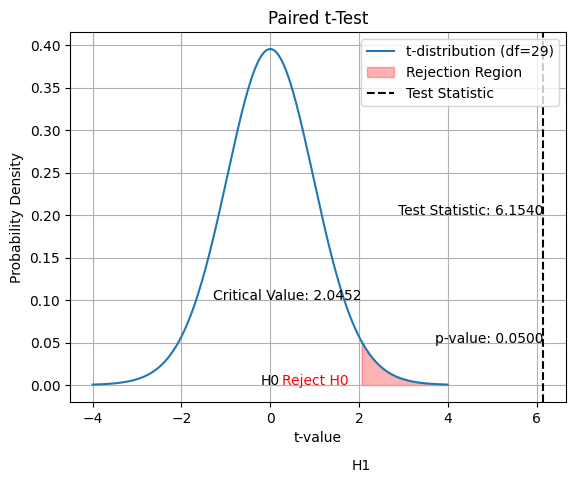

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
alpha = 0.05
df1 = 29
test_statistic = 6.1540281317120975
h0 = "H0"
h1 = "H1"
p_value = 0.05  # Example p-value, you should replace it with the actual value

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the t-distribution
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df=df1)
ax.plot(x, y, label='t-distribution (df={})'.format(df1))

# Shade the region beyond the critical value
cv = stats.t.ppf(1 - alpha/2, df=df1)
ax.fill_between(x, y, where=(x >= cv), color='red', alpha=0.3, label='Rejection Region')

# Plot the test statistic
ax.axvline(x=test_statistic, color='black', linestyle='--', label='Test Statistic')

# Add labels and title
ax.set_xlabel('t-value')
ax.set_ylabel('Probability Density')
ax.set_title('Paired t-Test')

# Add legend
ax.legend()

# Add text annotations
ax.text(test_statistic, 0.2, 'Test Statistic: {:.4f}'.format(test_statistic), ha='right')
ax.text(cv, 0.1, 'Critical Value: {:.4f}'.format(cv), ha='right')
ax.text(test_statistic, 0.05, 'p-value: {:.4f}'.format(p_value), ha='right')
ax.text(0, 0, h0, ha='center')
ax.text(cv/2, 0, 'Reject H0', ha='center', color='red')
ax.text(cv, -0.1, h1, ha='center')

# Show the plot
plt.grid(True)
plt.show()

In [21]:
cv

2.045229642132703

**chi^2-independence test: Compare independence of categorical data between 2 or more groups**

In [22]:
import numpy as np
import scipy.stats as stats

In [23]:
# H0 can be rejected ("H1"):
group1 = [560, 495, 553, 547, 512]
group2 = [369, 385, 358, 361, 393]
group3 = [209, 226, 248, 268, 285]
group4 = [267, 277, 304, 328, 340]
group5 = [64, 70, 93, 77, 126]

group1, group2, group3, group4, group5

([560, 495, 553, 547, 512],
 [369, 385, 358, 361, 393],
 [209, 226, 248, 268, 285],
 [267, 277, 304, 328, 340],
 [64, 70, 93, 77, 126])

In [24]:
# Creating a contingency table
data = np.array([group1, group2, group3, group4, group5])

# Performing chi-square test
chi_2, p, dof, expected = stats.chi2_contingency(data)

print("Chi-square statistic =", chi_2)
print("p-value =", p)
print("Degrees of freedom =", dof)
print("Expected contingency table =", expected)

# Significance level
alpha = 0.05

# Rejecting or accepting null hypothesis
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Chi-square statistic = 46.781260095528516
p-value = 7.365702337013401e-05
Degrees of freedom = 16
Expected contingency table = [[507.81892417 502.28788075 537.89397278 546.53622813 572.46299417]
 [355.30187946 351.43201555 376.34426442 382.39092677 400.5309138 ]
 [235.34465327 232.78133506 249.28269605 253.28788075 265.30343487]
 [288.65897602 285.51497084 305.75450421 310.66701231 325.40453662]
 [ 81.87556708  80.9837978   86.72456254  88.11795204  92.29812054]]
The null hypothesis can be rejected


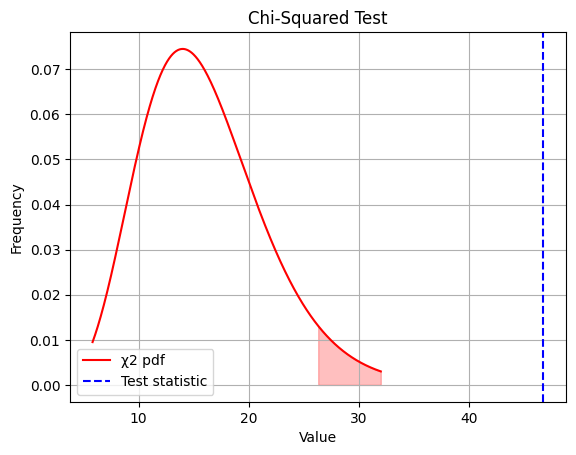

Chi-square statistic = 46.781260095528516
p-value = 7.365702337013401e-05
Degrees of freedom = 16
Critical value = 26.29622760486423
The null hypothesis can be rejected


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Constants
alpha = 0.05
df = 16
test_statistic = 46.781260095528516
p_value = chi2.sf(test_statistic, df)  # The survival function (1 - cdf) but more accurate for small p

# Plotting the chi-square distribution
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)
plt.plot(x, chi2.pdf(x, df), 'r-', label='χ2 pdf')

# Indicating the critical region
crit_value = chi2.ppf(1-alpha, df)
plt.fill_between(x, chi2.pdf(x, df), where=(x >= crit_value), color='red', alpha=0.25)

# Indicating the test statistic
plt.axvline(test_statistic, color='blue', linestyle='dashed', linewidth=1.5, label='Test statistic')

# Adding labels
plt.title('Chi-Squared Test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.grid()
plt.show()

# Display the p-value
#print(f"p-value = {p_value}")

print("Chi-square statistic =", chi_2)
print("p-value =", p_value)
print("Degrees of freedom =", df)
print("Critical value =", crit_value)

#print("Expected contingency table =", expected)

# Rejecting or accepting null hypothesis
if p_value < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

In [26]:
# H0 can't be rejected ("H0"):
group1 = [350, 495, 553, 590, 512]
group2 = [349, 485, 533, 587, 382]
group3 = [348, 485, 533, 587, 382]
group4 = [347, 484, 530, 587, 382]
group5 = [346, 480, 530, 587, 382]

# H0 can be rejected ("H1"):
#group1 = [560, 495, 553, 547, 512]
#group2 = [369, 385, 358, 361, 393]
#group3 = [209, 226, 248, 268, 285]
#group4 = [267, 277, 304, 328, 340]
#group5 = [64, 70, 93, 77, 126]

group1, group2, group3, group4, group5

([350, 495, 553, 590, 512],
 [349, 485, 533, 587, 382],
 [348, 485, 533, 587, 382],
 [347, 484, 530, 587, 382],
 [346, 480, 530, 587, 382])

In [27]:
# Creating a contingency table
data = np.array([group1, group2, group3, group4, group5])

# Performing chi-square test
chi_2, p, dof, expected = stats.chi2_contingency(data)

print("Chi-square statistic =", chi_2)
print("p-value =", p)
print("Degrees of freedom =", dof)
print("Expected contingency table =", expected)

# Significance level
alpha = 0.05

# Rejecting or accepting null hypothesis
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Chi-square statistic = 23.517290473280553
p-value = 0.10059032960589742
Degrees of freedom = 16
Expected contingency table = [[367.83358701 513.48723152 566.33688483 621.08912566 431.25317098]
 [343.7037037  479.80246914 529.18518519 580.34567901 402.96296296]
 [343.55657027 479.59707424 528.95865043 580.09724336 402.79046169]
 [342.82090309 478.57009978 527.82597666 578.85506511 401.92795535]
 [342.08523592 477.54312532 526.69330289 577.61288686 401.06544901]]
The null hypothesis cannot be rejected


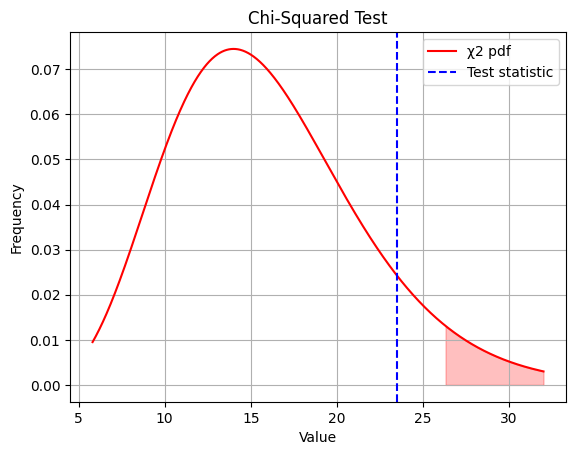

Chi-square statistic = 23.517290473280553
p-value = 0.10059032960589742
Degrees of freedom = 16
The null hypothesis cannot be rejected


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Constants
alpha = 0.05
df = 16
test_statistic = 23.517290473280553
p_value = chi2.sf(test_statistic, df)  # The survival function (1 - cdf) but more accurate for small p

# Plotting the chi-square distribution
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 1000)
plt.plot(x, chi2.pdf(x, df), 'r-', label='χ2 pdf')

# Indicating the critical region
crit_value = chi2.ppf(1-alpha, df)
plt.fill_between(x, chi2.pdf(x, df), where=(x >= crit_value), color='red', alpha=0.25)

# Indicating the test statistic
plt.axvline(test_statistic, color='blue', linestyle='dashed', linewidth=1.5, label='Test statistic')

# Adding labels
plt.title('Chi-Squared Test')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.grid()
plt.show()

# Display the p-value
#print(f"p-value = {p_value}")

print("Chi-square statistic =", chi_2)
print("p-value =", p_value)
print("Degrees of freedom =", df)
#print("Expected contingency table =", expected)

# Rejecting or accepting null hypothesis
if p_value < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

**F-TEST**

**don't reject H0:**

In [29]:
# Import the necessary packages
import scipy.stats as stats
import numpy as np

# Sample data
group1 = [82, 93, 61, 74, 69, 70, 53]
group2 = [71, 62, 85, 94, 78, 66, 71]
group3 = [64, 73, 87, 91, 56, 78, 87]

# Perform the one-way ANOVA
statistic, pvalue = stats.f_oneway(group1, group2, group3)

# Print the test statistic and p-value
print("Test statistic:", statistic)
print("p-value:", pvalue)

Test statistic: 0.2837261275904103
p-value: 0.7562784116739912


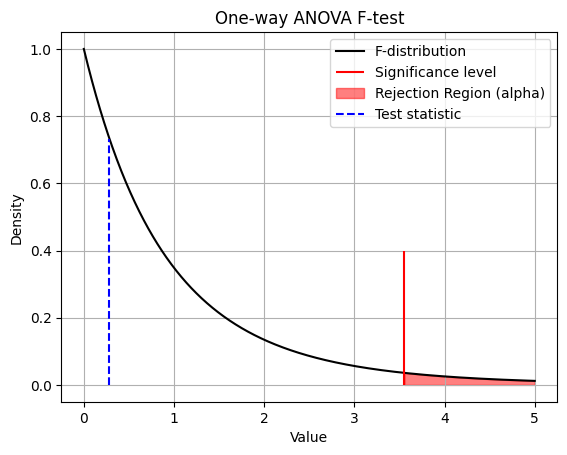

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Constants
alpha = 0.05
df1 = 2
df2 = 18
test_statistic = 0.283726128

# Create an array of x values
x = np.linspace(0, 5, 1000)

# Create an array of y values representing the probability density function (PDF)
y = f.pdf(x, df1, df2)

# Calculate critical value at alpha level
critical_value = f.ppf(1 - alpha, df1, df2)

# Create two subplots
fig, ax = plt.subplots()

# Plot the PDF
ax.plot(x, y, 'k', label='F-distribution')

plt.vlines([critical_value], 0, 0.4, colors='r', label='Significance level')


# Highlight the area under the curve past the critical value
x_fill = np.linspace(critical_value, 5, 100)
y_fill = f.pdf(x_fill, df1, df2)
ax.fill_between(x_fill, 0, y_fill, alpha=0.5, color='red', label='Rejection Region (alpha)')

# Plot the test statistic
ax.plot([test_statistic, test_statistic], [0, f.pdf(test_statistic, df1, df2)], 'b--', label='Test statistic')

# Set title and labels
ax.set_title('One-way ANOVA F-test')
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Add legend
ax.legend()

# Show plot
plt.grid(True)
plt.show()

In [31]:
print("Critical value:", critical_value)

Critical value: 3.554557145661787


**reject H0 (H1):**

In [32]:
# Import the necessary packages
import scipy.stats as stats
import numpy as np

# Sample data
group1 = [62, 53, 73, 54, 69, 70, 43]
group2 = [71, 62, 85, 74, 78, 66, 61]
group3 = [54, 63, 95, 91, 95, 78, 87]

# Perform the one-way ANOVA
statistic, pvalue = stats.f_oneway(group1, group2, group3)

# Print the test statistic and p-value
print("Test statistic:", statistic)
print("p-value:", pvalue)

Test statistic: 4.482229319048109
p-value: 0.026322503795791822


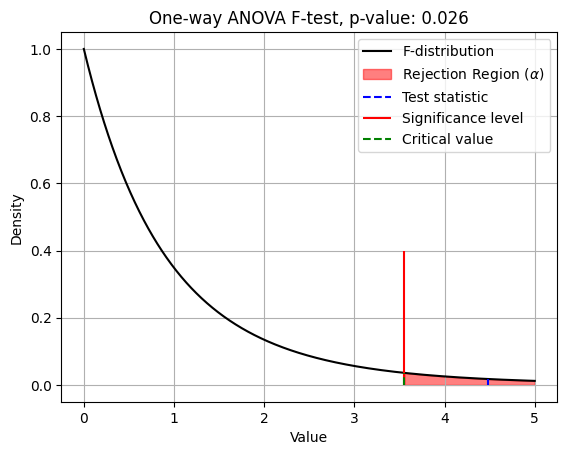

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Constants
alpha = 0.05
df1 = 2
df2 = 18
test_statistic = 4.482229319048109

# Create an array of x values
x = np.linspace(0, 5, 1000)

# Create an array of y values representing the probability density function (PDF)
y = f.pdf(x, df1, df2)

# Calculate critical value at alpha level
critical_value = f.ppf(1 - alpha, df1, df2)

# Calculate p-value
p_value = 1 - f.cdf(test_statistic, df1, df2)

# Create the plot
fig, ax = plt.subplots()

# Plot the PDF
ax.plot(x, y, 'k', label='F-distribution')

# Highlight the area under the curve past the critical value
x_fill = np.linspace(critical_value, 5, 100)
y_fill = f.pdf(x_fill, df1, df2)
ax.fill_between(x_fill, 0, y_fill, alpha=0.5, color='red', label='Rejection Region ($\\alpha$)')

# Plot the test statistic
ax.plot([test_statistic, test_statistic], [0, f.pdf(test_statistic, df1, df2)], 'b--', label='Test statistic')
ax.vlines(critical_value, 0, 0.4, colors='r', label='Significance level')
# Plot the critical value
ax.plot([critical_value, critical_value], [0, f.pdf(critical_value, df1, df2)], 'g--', label='Critical value')

# Set title and labels
ax.set_title(f'One-way ANOVA F-test, p-value: {p_value:.3f}')
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Add legend
ax.legend()

# Show plot
plt.grid(True)
plt.show()

In [34]:
print("Critical value:", critical_value)

Critical value: 3.554557145661787


** Pearson's Correlation test**

In [35]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = pearsonr(data1, data2)

In [36]:
print(f'stat={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent
